$\textbf{Empirical Exercise-Week 3}$  Page 189, Problem 4.27
Let's look at a similar example from your book, related wages to experience in the work force, as well as to gender and racial differences.  It is a larger data set with the same variables.  We are asked to compare regression coefficients for four different groups baased on gender and racial categories.  It is, de facto, an empirical investigation of work-force discrimination. 

You are free to use the LeSage toolbox or the Matlab built-in regress function.


In [77]:
clear all;
addpath(genpath('c:\LeSage7'));
clear all
Tab1 = readtable('cps5.csv');
Names = Tab1.Properties.VariableNames;
Names'


ans =

  23x1 cell array

    {'age'      }
    {'asian'    }
    {'black'    }
    {'divorced' }
    {'educ'     }
    {'exper'    }
    {'faminc'   }
    {'female'   }
    {'hrswork'  }
    {'insure'   }
    {'married'  }
    {'mcaid'    }
    {'mcare'    }
    {'metro'    }
    {'midwest'  }
    {'nchild'   }
    {'northeast'}
    {'single'   }
    {'south'    }
    {'union'    }
    {'wage'     }
    {'west'     }
    {'white'    }




In [80]:
Asian = Tab1(:,2); Aframer = Tab1(:,3); exper = Tab1(:,6); female = Tab1(:,8); 
wage = Tab1(:,21); white = Tab1(:,23);  educ = Tab1(:,5);  
single = Tab1(:,18);
who


Your variables are:

Aframer  Asian    Names    Tab1     ans      educ     exper    female   single   wage     white    




In [81]:
Asian1 = table2array(Asian); 
Aframer1= table2array(Aframer); exper1 = table2array(exper); female1 = table2array(female);
wage1 = table2array(wage); white1 = table2array(white);  educ1 = table2array(educ);
single1 = table2array(single);


Now lets do a dummy variable approach related wage to experience but with indicators for various groups.

In [83]:
y = (wage1); 
x = [ones(length(y),1) exper1 educ1 white1 Aframer1 female1 single1];
[Bols Bint Resid Res1 STATS]  = regress(y,x);
[Bols Bint]
STATS


ans =

  -13.0963  -15.2873  -10.9053
    0.1488    0.1242    0.1733
    2.5644    2.4594    2.6694
   -0.5618   -1.8388    0.7152
   -2.7741   -4.3372   -1.2111
   -3.9533   -4.5225   -3.3841
   -2.9436   -3.6561   -2.2310


STATS =

    0.2192  458.2397         0  201.8304




We extract from the data set subsets of data by gender and race (African American and white).

In [89]:
Data1 = [wage1 ones(9799,1) exper1];

WhiteMale = female1(:,1)==0 & white1(:,1)==1;
AframerMale = Aframer1(:,1) == 1 & female1(:,1)==0;
WhiteFemale =  female1(:,1)==1 & white1(:,1)== 1;
AframerFemale = Aframer1(:,1) == 1 & female1(:,1)== 1;

In [90]:
Data_WhiteMale = Data1(WhiteMale,:);
Data_AframerMale = Data1(AframerMale,:);
Data_WhiteFemale = Data1(WhiteFemale,:);
Data_AframerFemale = Data1(AframerFemale,:);

In [91]:
CV_WhiteMale =  100 * std(Data_WhiteMale(:,1))/mean(Data_WhiteMale(:,1));
CV_AframerMale =  100 * std(Data_AframerMale(:,1))/mean(Data_AframerMale(:,1));
CV_WhiteFemale =  100 * std(Data_WhiteFemale(:,1))/mean(Data_WhiteFemale(:,1));
CV_AframerFemale =  100 * std(Data_AframerFemale(:,1))/mean(Data_AframerFemale(:,1));

In [10]:
[CV_WhiteMale CV_AframerMale CV_WhiteFemale CV_AframerFemale]


ans =

   61.0780   56.6434   79.8826   68.7235




We see that white females have greater variation in their wages, then African American females, relative to their male counterparts.

Lets do a regression for each subset, of (wage) on a constant and experience.

In [92]:
yy_WhiteMale = (Data_WhiteMale(:,1)); xx_WhiteMale = Data_WhiteMale(:,2:end);
yy_AframerMale = (Data_AframerMale(:,1)); xx_AframerMale = Data_AframerMale(:,2:end);
yy_WhiteFemale = (Data_WhiteFemale(:,1)); xx_WhiteFemale = Data_WhiteFemale(:,2:end);
yy_AframerFemale = (Data_AframerFemale(:,1)); 
xx_AframerFemale = Data_AframerFemale(:,2:end);


In [93]:
results_WhiteMale = ols(yy_WhiteMale, xx_WhiteMale);
results_WhiteFemale = ols(yy_WhiteFemale, xx_WhiteFemale);
results_AframerMale = ols(yy_AframerMale, xx_AframerMale);
results_AframerFemale = ols(yy_AframerFemale, xx_AframerFemale);

Let's look at the confidence intervals for the experience coefficient for the four subsets

In [95]:
[results_WhiteMale.bint(2,:); results_WhiteFemale.bint(2,:); results_AframerMale.bint(2,:); ...
results_AframerFemale.bint(2,:)]


ans =

    0.1260    0.1927
    0.0108    0.0986
    0.0226    0.1913
   -0.0094    0.1852




You readily see that while male coefficient is always above that of White Females, but not always above that of African Amerians, both males and females.

In [96]:
[results_WhiteMale.rsqr; results_WhiteFemale.rsqr; results_AframerMale.rsqr; ...
results_AframerFemale.rsqr]


ans =

    0.0182
    0.0016
    0.0152
    0.0067




Above we see the overall goodness of fit. The highest  R2R2  measure is for the white males.

In [97]:
save Exercise_Week3

In [98]:
Tab2 = readtable('newbroiler.csv');


In [99]:
Names = Tab2.Properties.VariableNames;
Names'


ans =

  10x1 cell array

    {'year'  }
    {'q'     }
    {'y'     }
    {'p'     }
    {'pb'    }
    {'pcorn' }
    {'pf'    }
    {'qprod' }
    {'lexpts'}
    {'popgro'}




In [29]:
q = Tab2(:,2);  q = table2array(q);
p = Tab2(:,4);  p = table2array(p);

In [30]:
y = log(q);
x = [ones(length(y),1), log(p)];

In [33]:
[B,BINT,R,RINT,STATS] = regress(y,x);

In [34]:
[B BINT]


ans =

    3.7169    3.6720    3.7619
   -1.1214   -1.2193   -1.0234




In [35]:
STATS



STATS =

    0.9136  528.9623    0.0000    0.0139




In [36]:
help regress

 REGRESS Multiple linear regression using least squares.
    B = REGRESS(Y,X) returns the vector B of regression coefficients in the
    linear model Y = X*B.  X is an n-by-p design matrix, with rows
    corresponding to observations and columns to predictor variables.  Y is
    an n-by-1 vector of response observations.
 
    [B,BINT] = REGRESS(Y,X) returns a matrix BINT of 95% confidence
    intervals for B.
 
    [B,BINT,R] = REGRESS(Y,X) returns a vector R of residuals.
 
    [B,BINT,R,RINT] = REGRESS(Y,X) returns a matrix RINT of intervals that
    can be used to diagnose outliers.  If RINT(i,:) does not contain zero,
    then the i-th residual is larger than would be expected, at the 5%
    significance level.  This is evidence that the I-th observation is an
    outlier.
 
    [B,BINT,R,RINT,STATS] = REGRESS(Y,X) returns a vector STATS containing, in
    the following order, the R-square statistic, the F statistic and p value
    for the full model, and an estimate of the error 

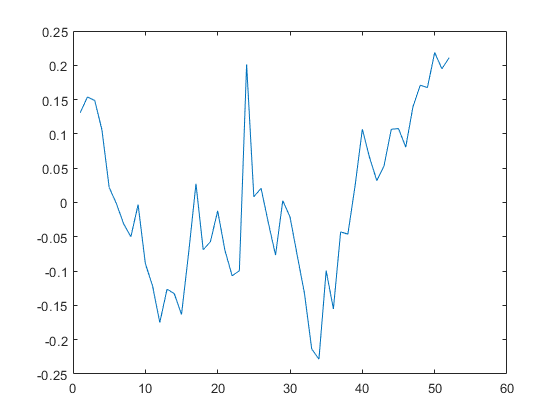

In [37]:
plot(R)

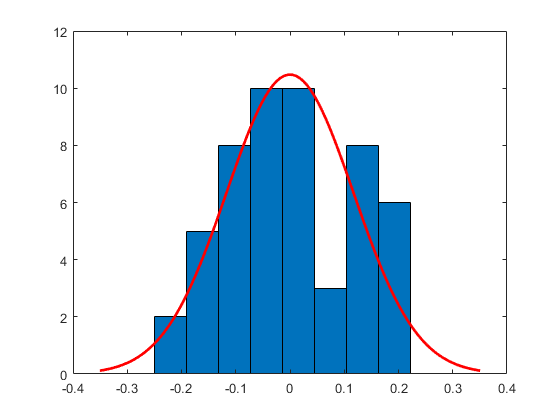

In [38]:
histfit(R)

In [39]:
h = jbtest(R)


h =

     0




In [40]:
y = (q);
x = [ones(length(y),1), (1./p)];
[b bint r rint stats] = regress(y,x);

In [41]:
b


b =

   -6.0244
   48.3650




In [42]:
bint


bint =

  -10.1604   -1.8883
   43.2207   53.5093




In [43]:
stats



stats =

    0.8770  356.5985    0.0000   18.0192




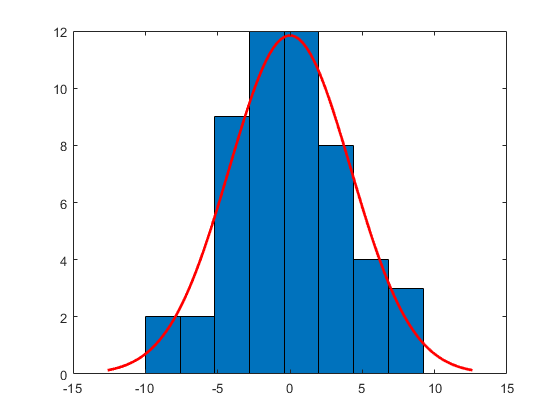

In [44]:
histfit(r)


In [45]:
hh = jbtest(r)


hh =

     0




Now lets look at the quantity produced as a function of the price of corn.